# PyTorch Logistic Regression Model

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Initializing Dataset

### *Generating Classification Dataset*

In [13]:
X, y = make_classification(
    n_samples = 500, 
    n_features = 2, 
    n_redundant = 0, 
    n_informative = 2, 
    n_clusters_per_class = 1, 
    random_state = 42
    )

### *Scaling and Spliting Dataset into Training and Testing Data*

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   #Only X is scaled since y is already in 0-1 range

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### *Converting the data to PyTorch tensors*

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1,1), dtype = torch.float32)         #y is a 1D array (n_samples,) but PyTorch expects 2D (n_samples, n_outputs)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)                         #y values are reshaped to 2D
y_test_tensor = torch.tensor(y_test.reshape(-1,1), dtype = torch.float32)

### *Visualizing the dataset*

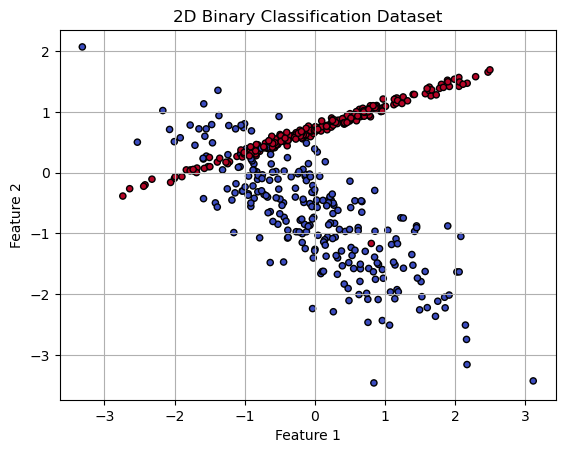

In [16]:
fig, ax = plt.subplots(1,1)
ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='coolwarm', edgecolor='k', s=20)
ax.set_title('2D Binary Classification Dataset')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True)
plt.show()

## Defining the Neural Network Model

In [19]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initializing the Neural Network Model

In [20]:
model = SimpleNN(input_dim = 2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the Model

In [23]:
num_epochs = 30
train_accuracies = []
test_accuracies = []
losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.no_grad():
        #Training Accuracy
        train_preds = (outputs>= 0.5).float()
        train_acc = accuracy_score(y_train_tensor.numpy(), train_preds.numpy())

        #Testing Accuracy
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float()
        test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    losses.append(loss.item())

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item():.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_acc:.4f}")


Epoch 1/30 - Loss: 0.4246 - Train Acc: 0.8275 - Test Acc: 0.8500
Epoch 2/30 - Loss: 0.4174 - Train Acc: 0.8250 - Test Acc: 0.8500
Epoch 3/30 - Loss: 0.4104 - Train Acc: 0.8250 - Test Acc: 0.8600
Epoch 4/30 - Loss: 0.4036 - Train Acc: 0.8200 - Test Acc: 0.8600
Epoch 5/30 - Loss: 0.3969 - Train Acc: 0.8250 - Test Acc: 0.8700
Epoch 6/30 - Loss: 0.3903 - Train Acc: 0.8300 - Test Acc: 0.8600
Epoch 7/30 - Loss: 0.3839 - Train Acc: 0.8375 - Test Acc: 0.8600
Epoch 8/30 - Loss: 0.3776 - Train Acc: 0.8425 - Test Acc: 0.8700
Epoch 9/30 - Loss: 0.3714 - Train Acc: 0.8475 - Test Acc: 0.8700
Epoch 10/30 - Loss: 0.3654 - Train Acc: 0.8450 - Test Acc: 0.8700
Epoch 11/30 - Loss: 0.3594 - Train Acc: 0.8525 - Test Acc: 0.8700
Epoch 12/30 - Loss: 0.3536 - Train Acc: 0.8525 - Test Acc: 0.8700
Epoch 13/30 - Loss: 0.3478 - Train Acc: 0.8575 - Test Acc: 0.8700
Epoch 14/30 - Loss: 0.3423 - Train Acc: 0.8675 - Test Acc: 0.8700
Epoch 15/30 - Loss: 0.3368 - Train Acc: 0.8700 - Test Acc: 0.8700
Epoch 16/30 - Loss: